In [ ]:
#импортирование нужных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from scipy import stats
import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [ ]:
df= pd.read_csv("/content/heart.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
df.shape

(1025, 14)

In [ ]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

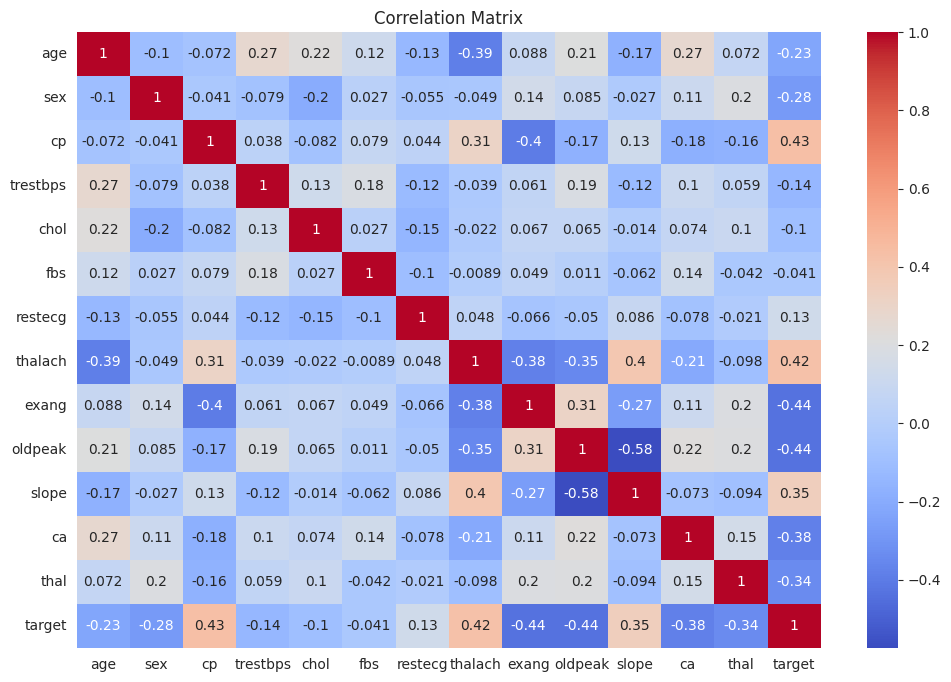

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

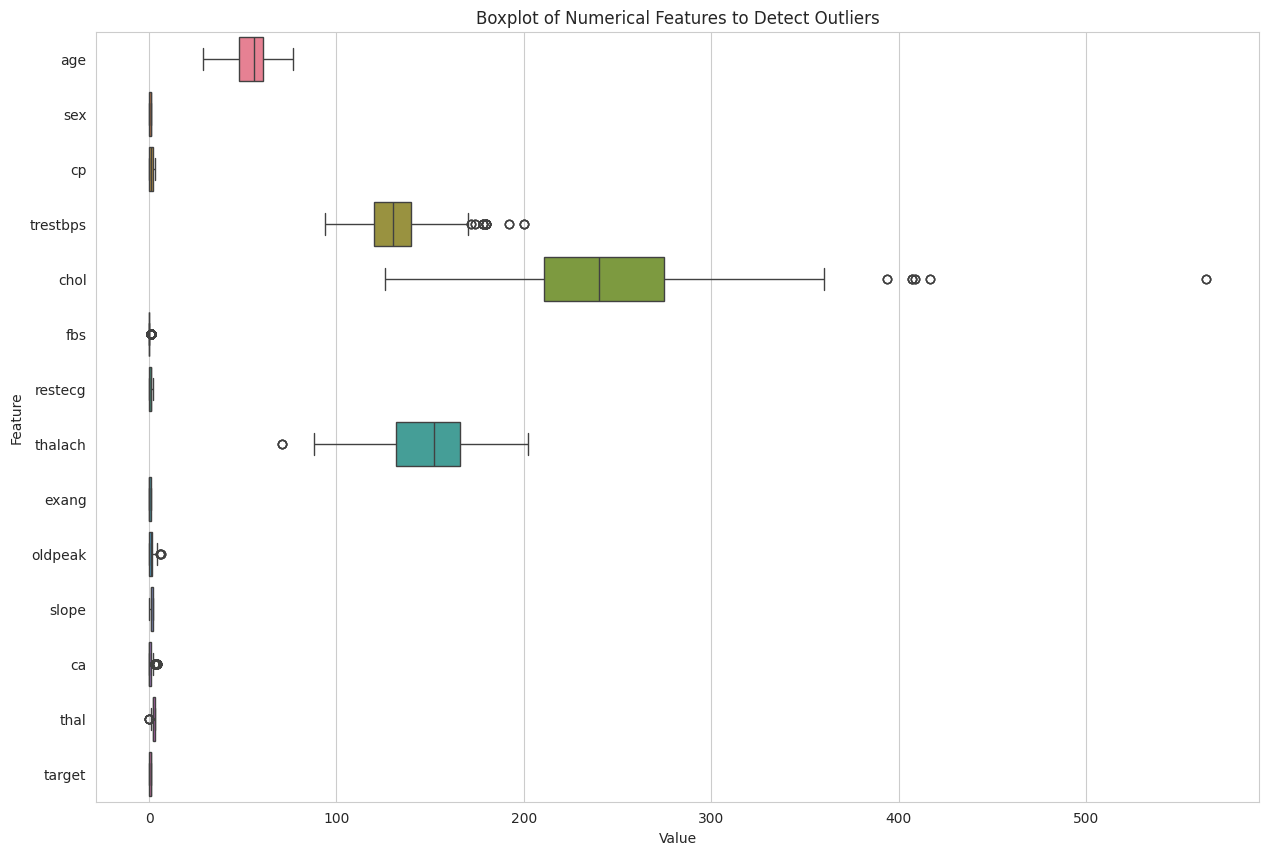

In [ ]:
numerical_features = ['age', 'sex', 'cp', 'trestbps', 'chol',
                      'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

plt.figure(figsize=(15,10))
sns.boxplot(data=df[numerical_features], orient="h")
plt.title('Boxplot of Numerical Features to Detect Outliers') #показ boxplot для определения выбросов
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

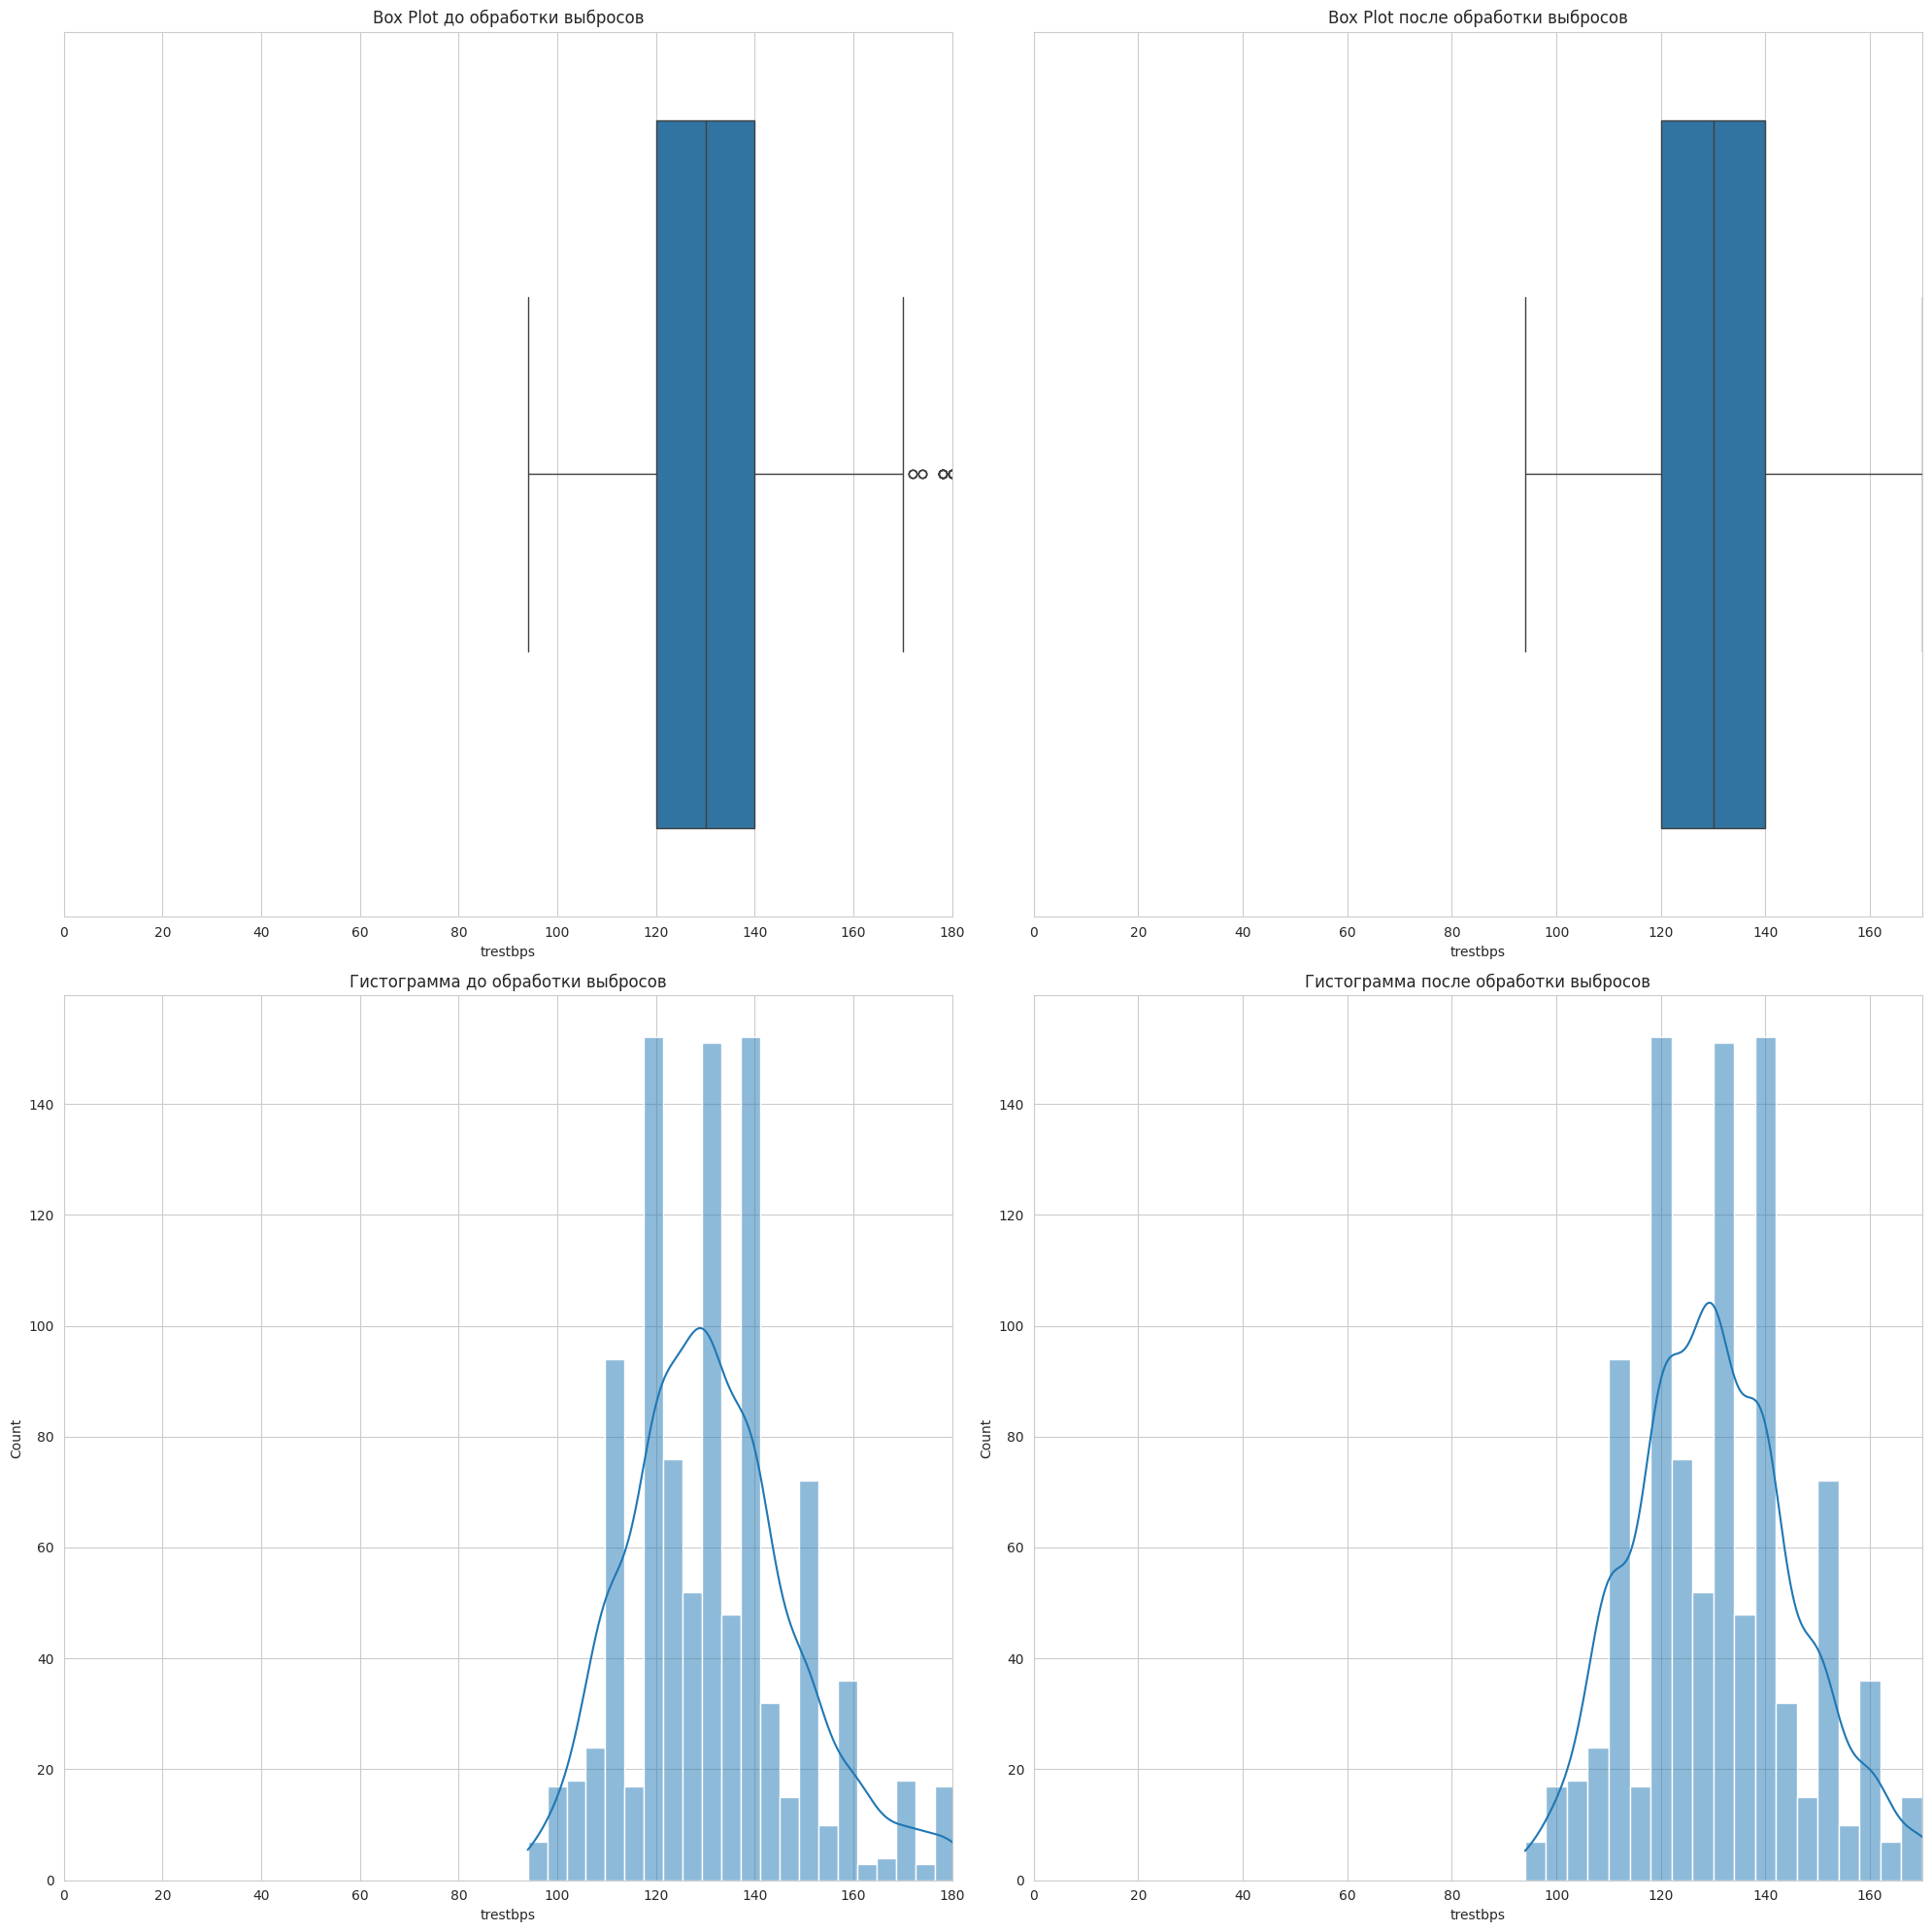

Статистики до обработки выбросов:
count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

Статистики после обработки выбросов:
count    995.000000
mean     130.092462
std       15.326543
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: trestbps, dtype: float64

Процент удаленных выбросов: 2.93%


In [ ]:
def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return (data < lower_bound) | (data > upper_bound)

#поиск выбросов с помощью z-score
def find_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold


df_processed = df.copy()


outliers_iqr = find_outliers_iqr(df_processed['trestbps']) #поиск выбросов с помощью IQR
outliers_zscore = find_outliers_zscore(df_processed['trestbps']) #поиск выбросов с помощью z-score


df_processed = df_processed[~outliers_iqr]


fig, axes = plt.subplots(2, 2, figsize=(20, 20))

#показ boxplot до и после обработки выбросов
sns.boxplot(x=df['trestbps'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot до обработки выбросов')
axes[0, 0].set_xlim(0, df['trestbps'].quantile(0.99))


sns.boxplot(x=df_processed['trestbps'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot после обработки выбросов')
axes[0, 1].set_xlim(0, df_processed['trestbps'].quantile(0.99))


sns.histplot(df['trestbps'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Гистограмма до обработки выбросов')
axes[1, 0].set_xlim(0, df['trestbps'].quantile(0.99))


sns.histplot(df_processed['trestbps'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Гистограмма после обработки выбросов')
axes[1, 1].set_xlim(0, df_processed['trestbps'].quantile(0.99))

plt.tight_layout()
plt.show()

#показ статистики до и после обработки выбросо
print("Статистики до обработки выбросов:")
print(df['trestbps'].describe())
print("\nСтатистики после обработки выбросов:")
print(df_processed['trestbps'].describe())


outliers_removed = (len(df) - len(df_processed)) / len(df) * 100
print(f"\nПроцент удаленных выбросов: {outliers_removed:.2f}%")

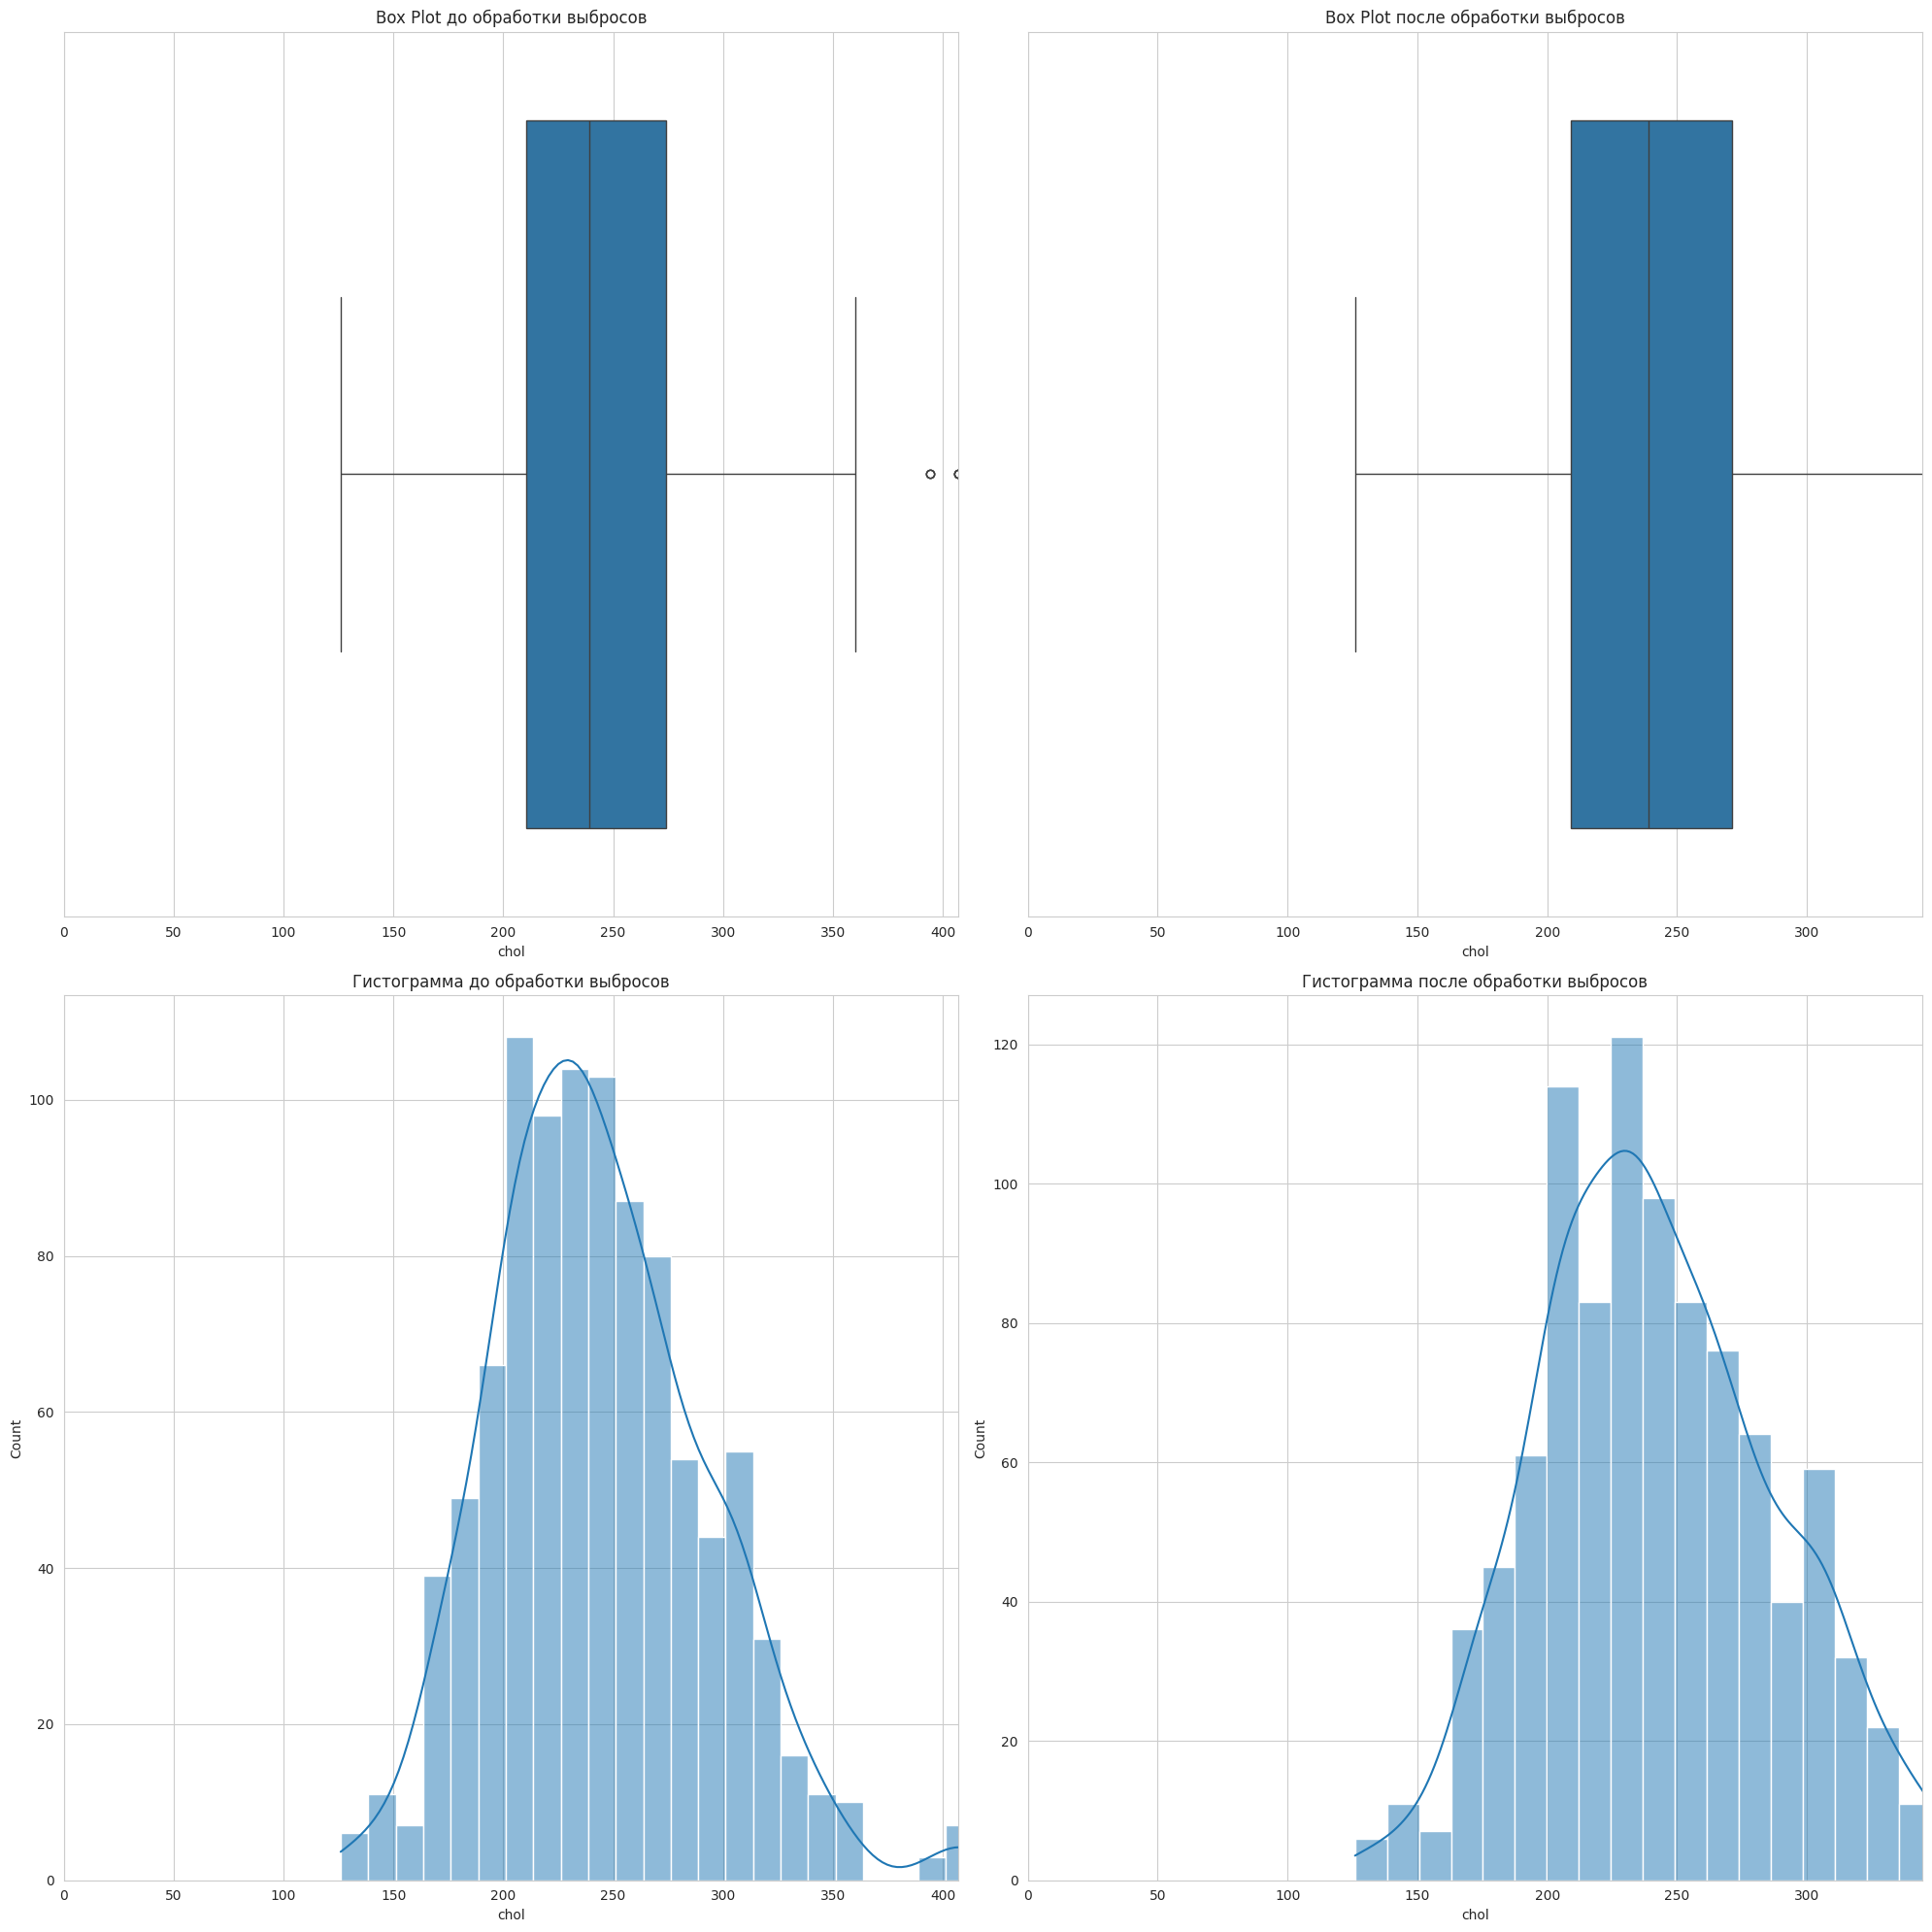

Статистики до обработки выбросов:
count    995.000000
mean     245.204020
std       51.700262
min      126.000000
25%      210.500000
50%      239.000000
75%      274.000000
max      564.000000
Name: chol, dtype: float64

Статистики после обработки выбросов:
count    979.000000
mean     242.081716
std       45.247349
min      126.000000
25%      209.000000
50%      239.000000
75%      271.000000
max      360.000000
Name: chol, dtype: float64

Процент удаленных выбросов: 1.61%


In [ ]:
def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return (data < lower_bound) | (data > upper_bound)

#поиск выбросов с помощью z-score
def find_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold


df2 = df_processed.copy()


outliers_iqr = find_outliers_iqr(df2['chol']) #поиск выбросов с помощью IQR
outliers_zscore = find_outliers_zscore(df2['chol']) #поиск выбросов с помощью z-score


df2 = df2[~outliers_iqr]


fig, axes = plt.subplots(2, 2, figsize=(20, 20))

#показ boxplot до и после обработки выбросов
sns.boxplot(x=df_processed['chol'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot до обработки выбросов')
axes[0, 0].set_xlim(0, df_processed['chol'].quantile(0.99))


sns.boxplot(x=df2['chol'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot после обработки выбросов')
axes[0, 1].set_xlim(0, df2['chol'].quantile(0.99))


sns.histplot(df_processed['chol'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Гистограмма до обработки выбросов')
axes[1, 0].set_xlim(0, df_processed['chol'].quantile(0.99))


sns.histplot(df2['chol'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Гистограмма после обработки выбросов')
axes[1, 1].set_xlim(0, df2['chol'].quantile(0.99))

plt.tight_layout()
plt.show()

#показ статистики до и после обработки выбросо
print("Статистики до обработки выбросов:")
print(df_processed['chol'].describe())
print("\nСтатистики после обработки выбросов:")
print(df2['chol'].describe())


outliers_removed = (len(df_processed) - len(df2)) / len(df_processed) * 100
print(f"\nПроцент удаленных выбросов: {outliers_removed:.2f}%")

In [ ]:
df2.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

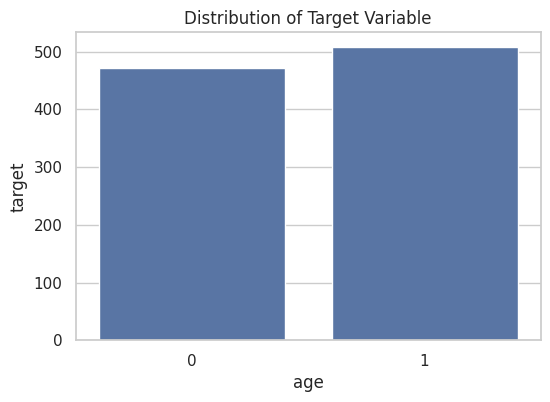

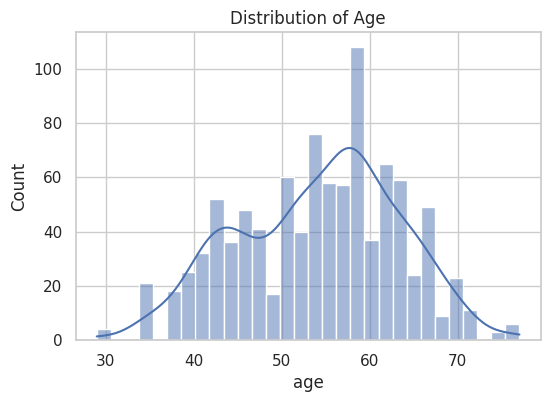

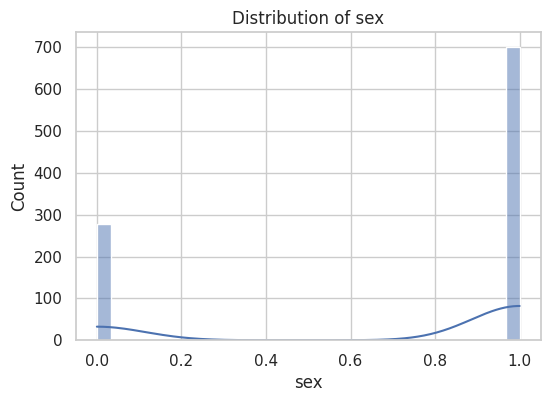

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='target')
plt.title('Distribution of Target Variable') #показ распределения целевой переменной target
plt.xlabel('age')
plt.ylabel('target')
plt.show()


plt.figure(figsize=(6, 4))
sns.histplot(df2['age'], bins=30, kde=True) #показ распределения возраста
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df2['sex'], bins=30, kde=True) #показ распределения длительности
plt.title('Distribution of sex')
plt.show()


plt.figure(figsize=(6, 4))
sns.histplot(df2['cp'], bins=30, kde=True) #показ распределения CP
plt.title('Distribution of CP')
plt.show()

In [ ]:
df2.to_csv("heart_processed.csv", index=False)

In [ ]:
df=pd.read_csv("/content/heart_processed.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [69]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [68]:
def plotCorrelationMatrix(df, graphWidth, filename="data"):
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [70]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

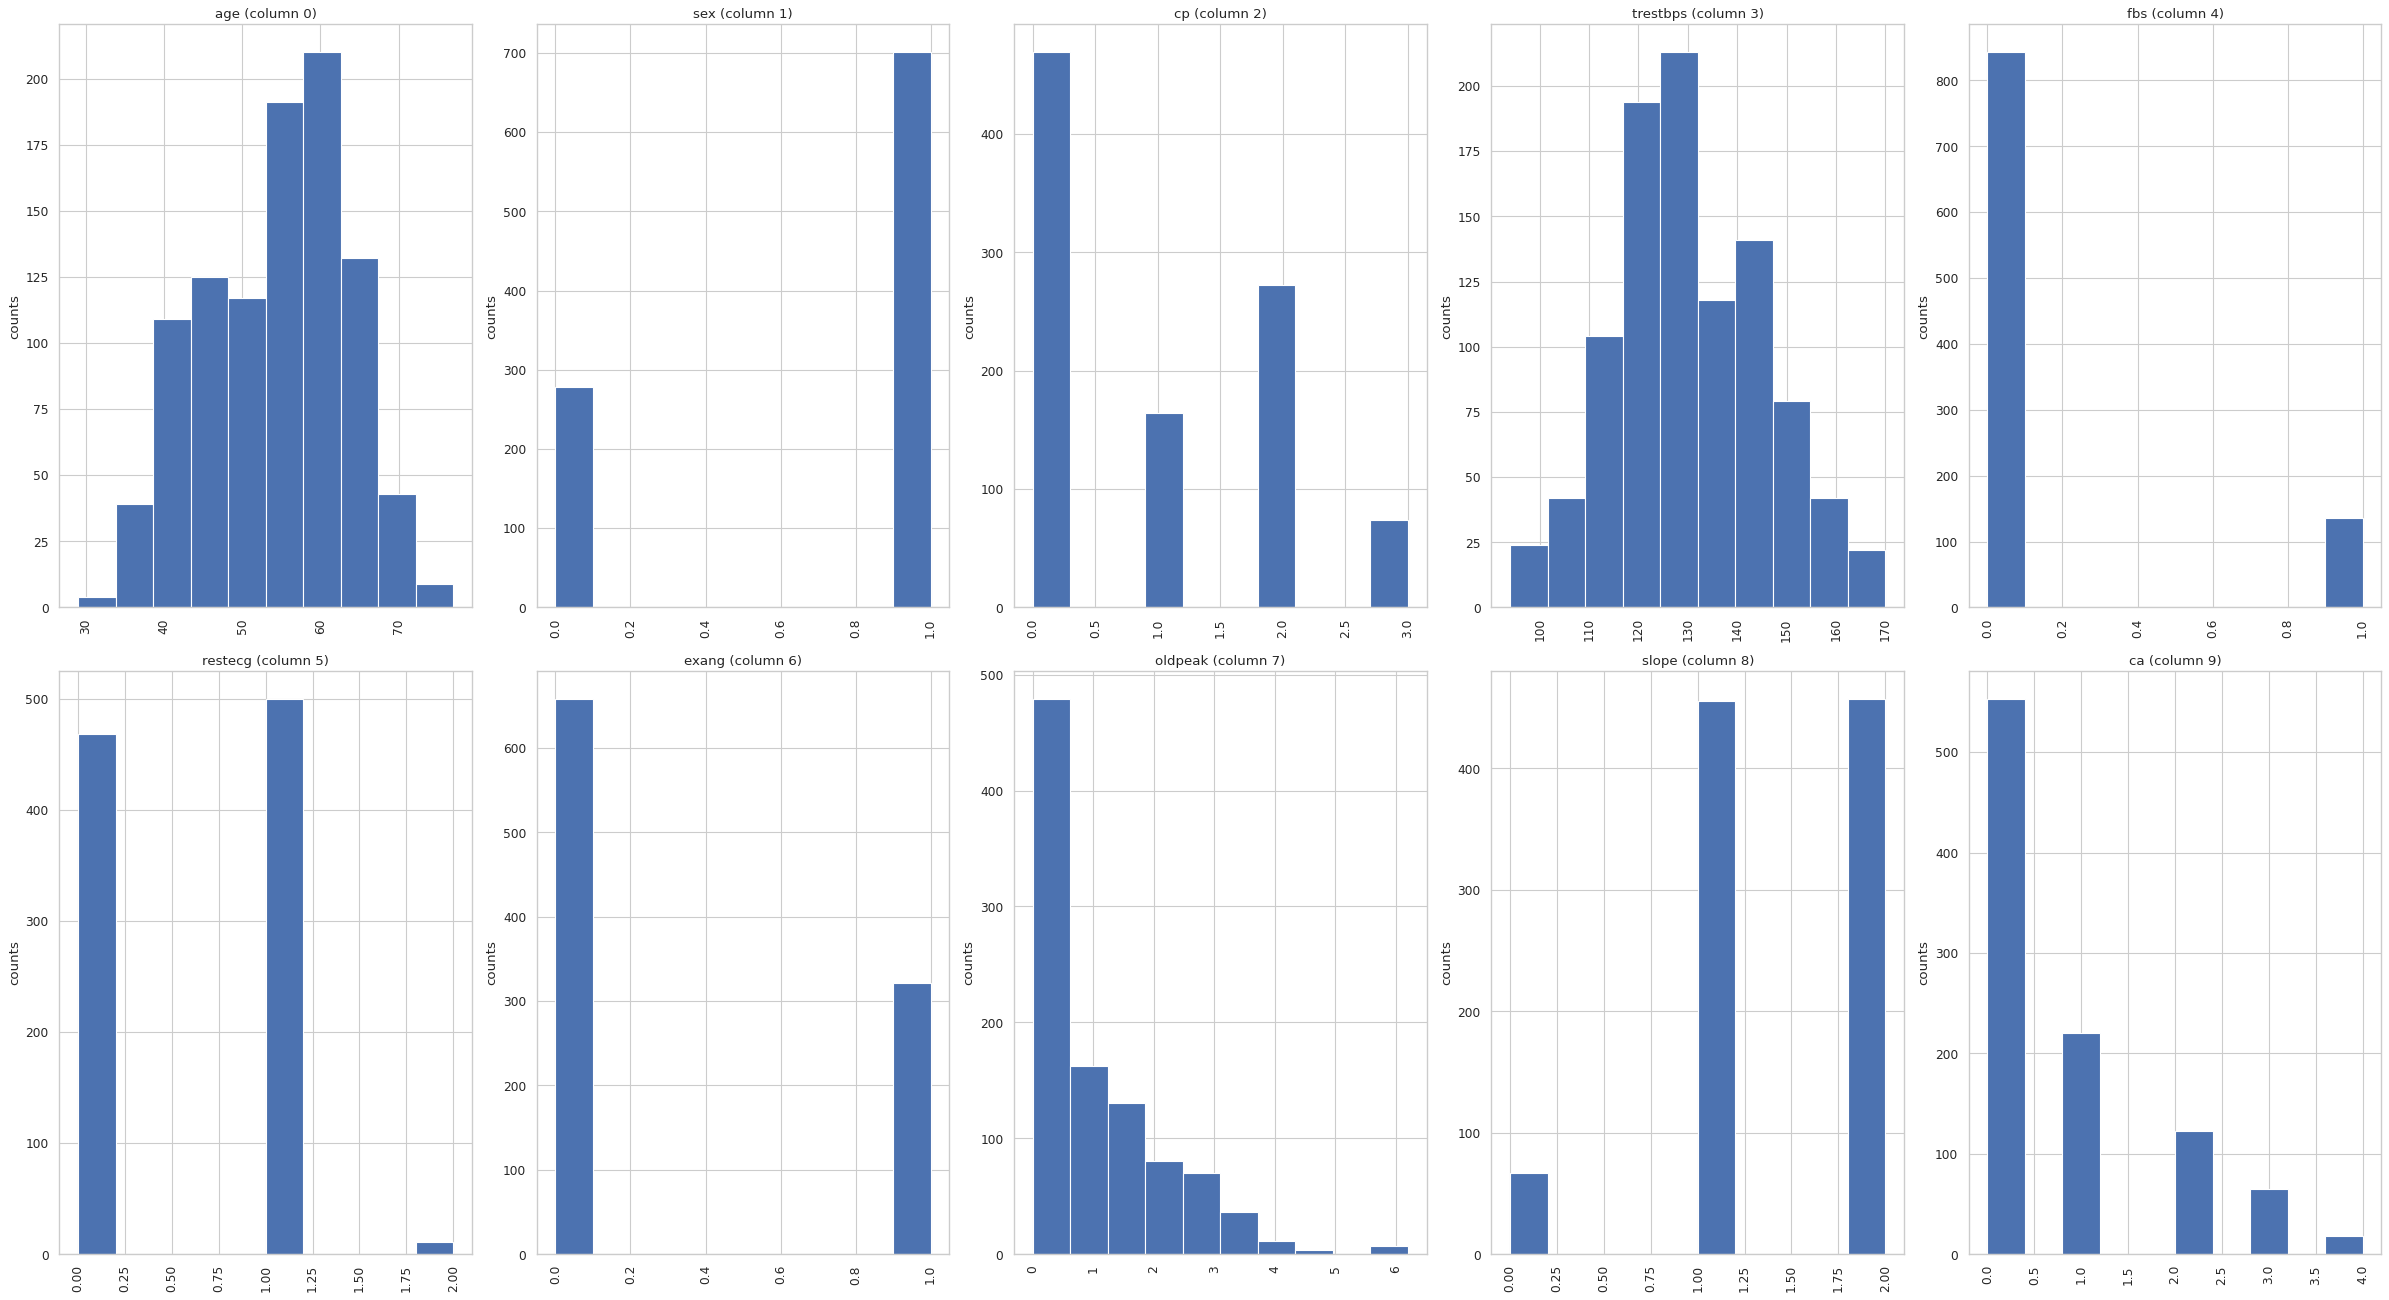

In [ ]:
plotPerColumnDistribution(df, 10, 5)

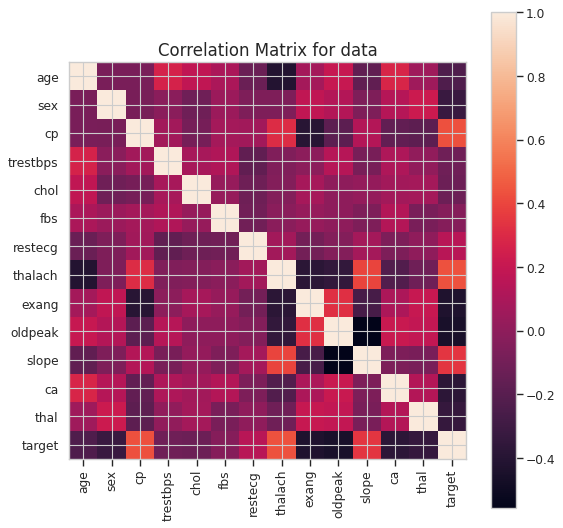

In [ ]:
plotCorrelationMatrix(df, 8)

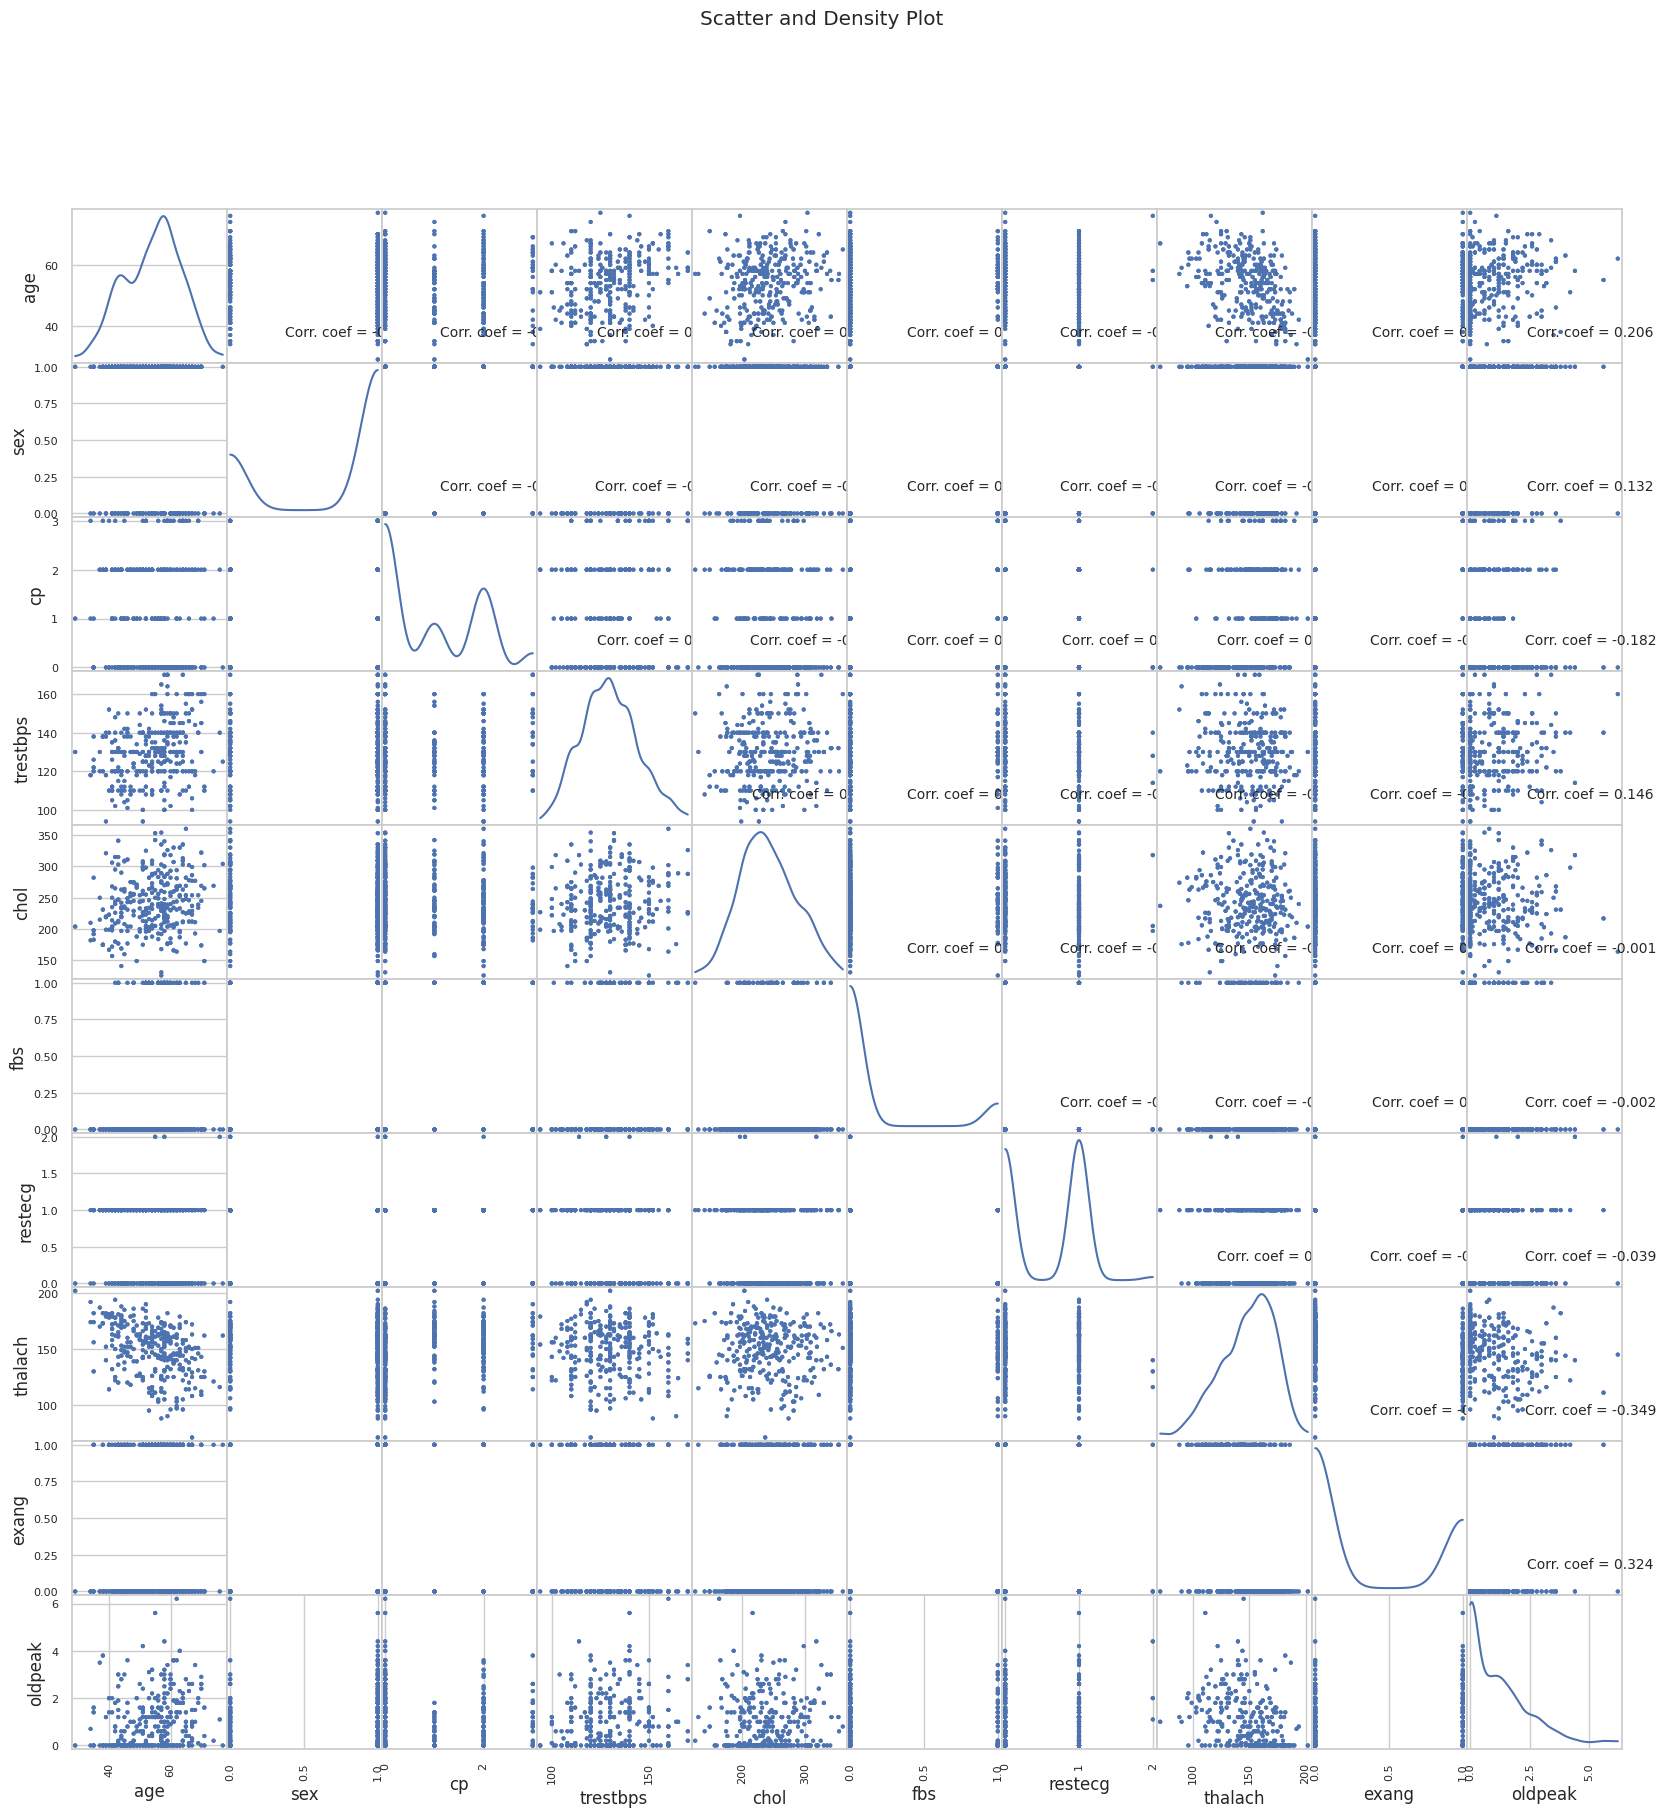

In [ ]:
plotScatterMatrix(df, 20, 10)

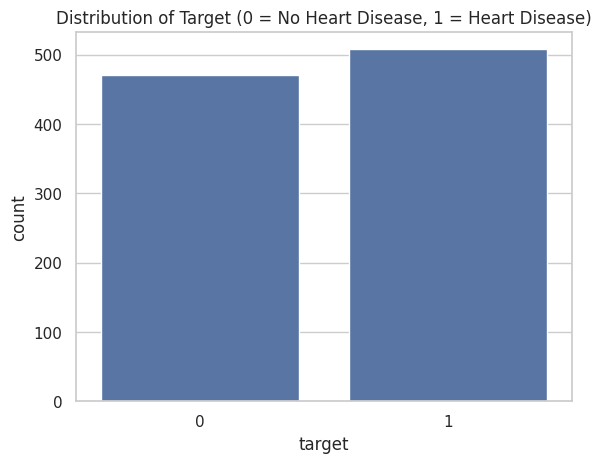

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

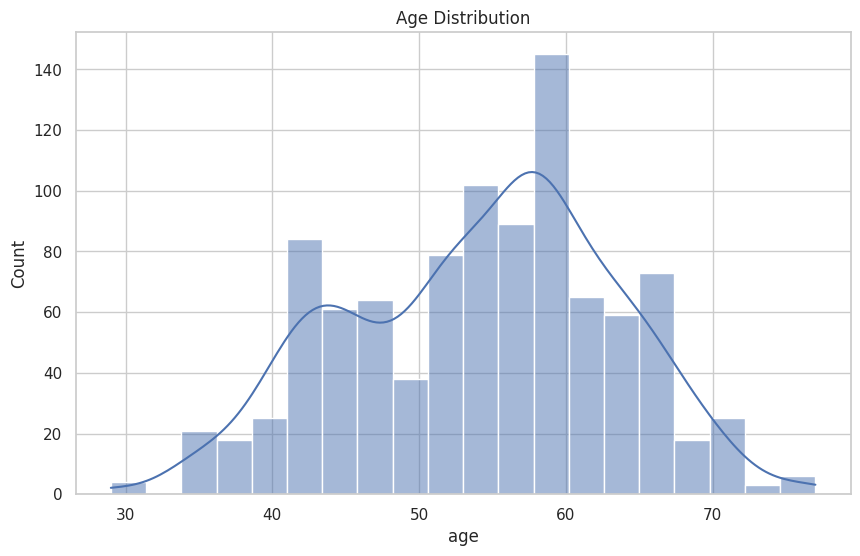

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

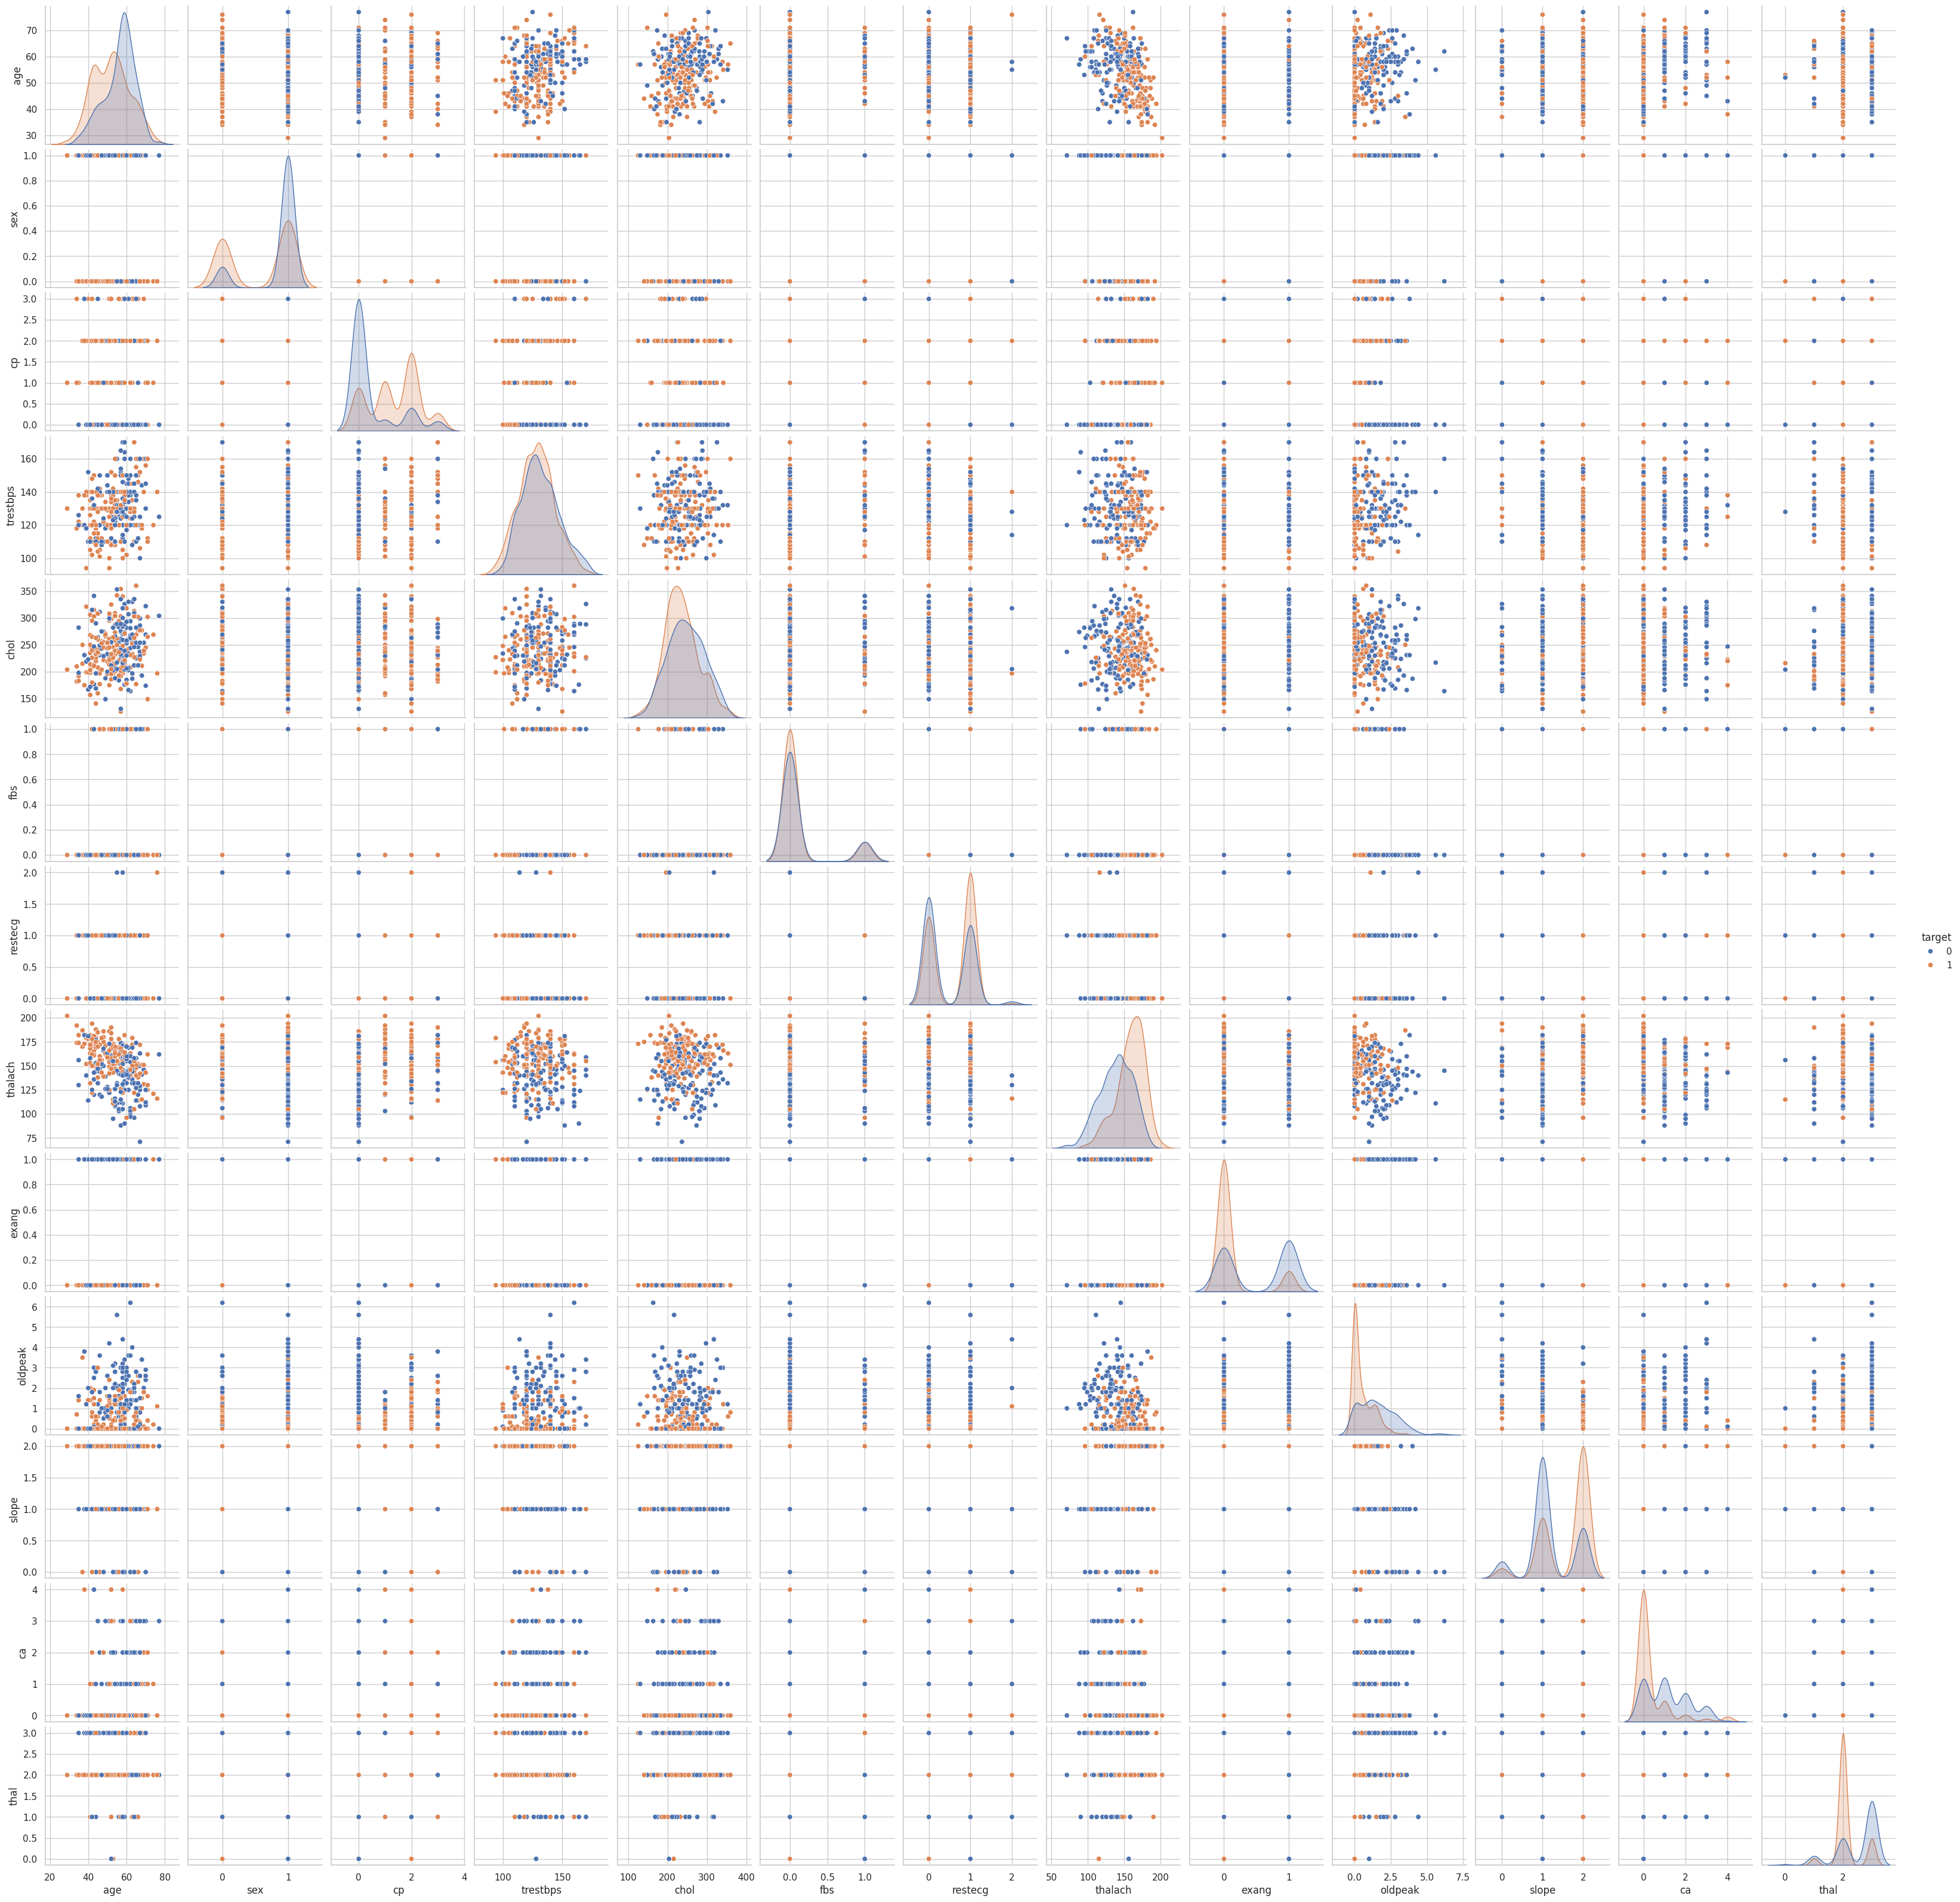

In [ ]:
sns.pairplot(df, hue='target')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X= df.drop('target', axis=1)
y= df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

In [ ]:
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

In [ ]:
results = []
for name, model in models.items():
    start_time = time()
    cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time()

    accuracy_score = np.mean(cv_results['test_accuracy'])
    precision_score = np.mean(cv_results['test_precision'])
    recall_score = np.mean(cv_results['test_recall'])
    f1_score = np.mean(cv_results['test_f1'])
    roc_auc_score = np.mean(cv_results['test_roc_auc'])
    execution_time = end_time - start_time

    results.append({
        "Model": name,
        "Accuracy": accuracy_score,
        "Precision": precision_score,
        "Recall": recall_score,
        "F1 Score": f1_score,
        "ROC AUC Score": roc_auc_score,
        "Execution Time": execution_time
    })

    print(f"{name} completed in {execution_time:.4f} seconds.")


Logistic Regression completed in 0.2587 seconds.
Decision Tree completed in 0.2289 seconds.
Random Forest completed in 3.0036 seconds.
Support Vector Machine completed in 0.2863 seconds.
K-Nearest Neighbors completed in 0.1523 seconds.
Gradient Boosting completed in 0.9572 seconds.
AdaBoost completed in 0.6505 seconds.


In [66]:
results_df = pd.DataFrame(results)
results_df

Model  Accuracy  Precision    Recall  F1 Score  \
0     Logistic Regression  0.854442   0.842009  0.895533  0.866863   
1           Decision Tree  0.982084   0.983666  0.982956  0.983128   
2           Random Forest  0.980802   0.976607  0.987834  0.982005   
3  Support Vector Machine  0.895272   0.894659  0.910050  0.901396   
4     K-Nearest Neighbors  0.813466   0.830701  0.812842  0.820425   
5       Gradient Boosting  0.965515   0.958410  0.978166  0.967616   
6                AdaBoost  0.902940   0.903725  0.917485  0.909463   

   ROC AUC Score  Execution Time  
0       0.921181        0.258718  
1       0.982019        0.228934  
2       0.997439        3.003628  
3       0.966370        0.286283  
4       0.932467        0.152316  
5       0.985213        0.957157  
6       0.966863        0.650482

In [ ]:
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

Model  Accuracy  Precision    Recall  F1 Score  \
1           Decision Tree  0.982084   0.983666  0.982956  0.983128   
2           Random Forest  0.980802   0.976607  0.987834  0.982005   
5       Gradient Boosting  0.965515   0.958410  0.978166  0.967616   
6                AdaBoost  0.902940   0.903725  0.917485  0.909463   
3  Support Vector Machine  0.895272   0.894659  0.910050  0.901396   
0     Logistic Regression  0.854442   0.842009  0.895533  0.866863   
4     K-Nearest Neighbors  0.813466   0.830701  0.812842  0.820425   

   ROC AUC Score  Execution Time  
1       0.982019        0.228934  
2       0.997439        3.003628  
5       0.985213        0.957157  
6       0.966863        0.650482  
3       0.966370        0.286283  
0       0.921181        0.258718  
4       0.932467        0.152316

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Gradient Boosting'),
  Text(3, 0, 'AdaBoost'),
  Text(4, 0, 'Support Vector Machine'),
  Text(5, 0, 'Logistic Regression'),
  Text(6, 0, 'K-Nearest Neighbors')])

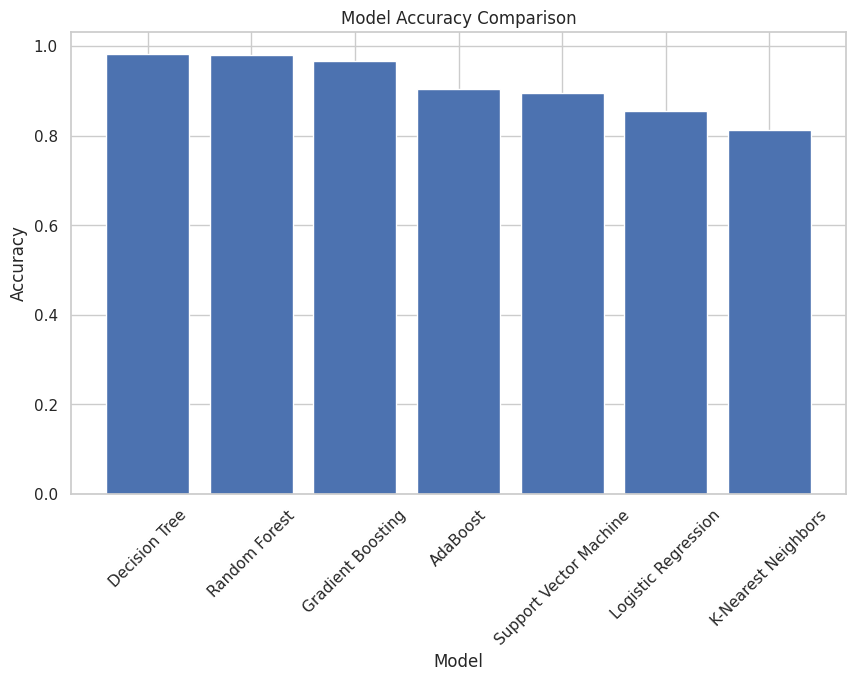

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)

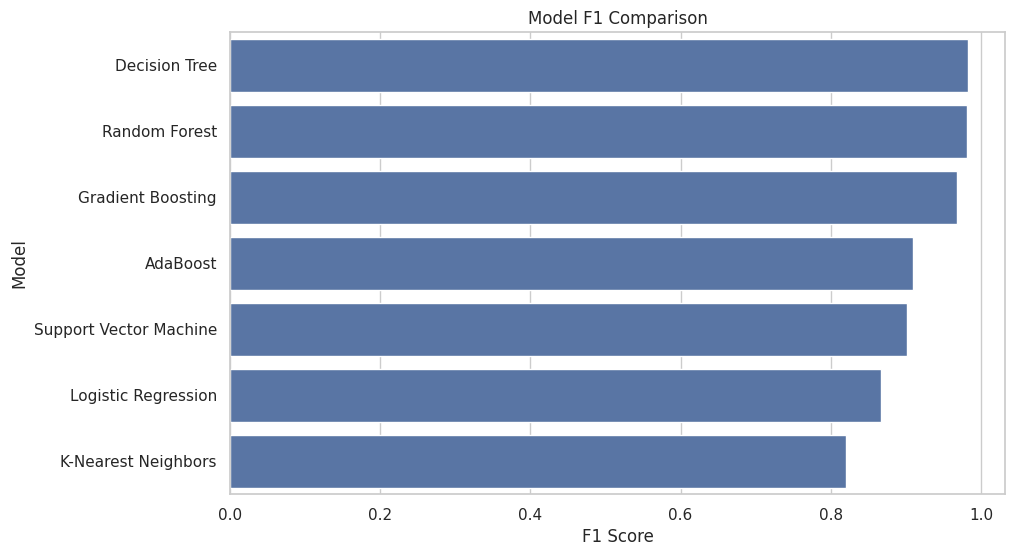

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=results_df)
plt.title('Model F1 Comparison')
plt.show()

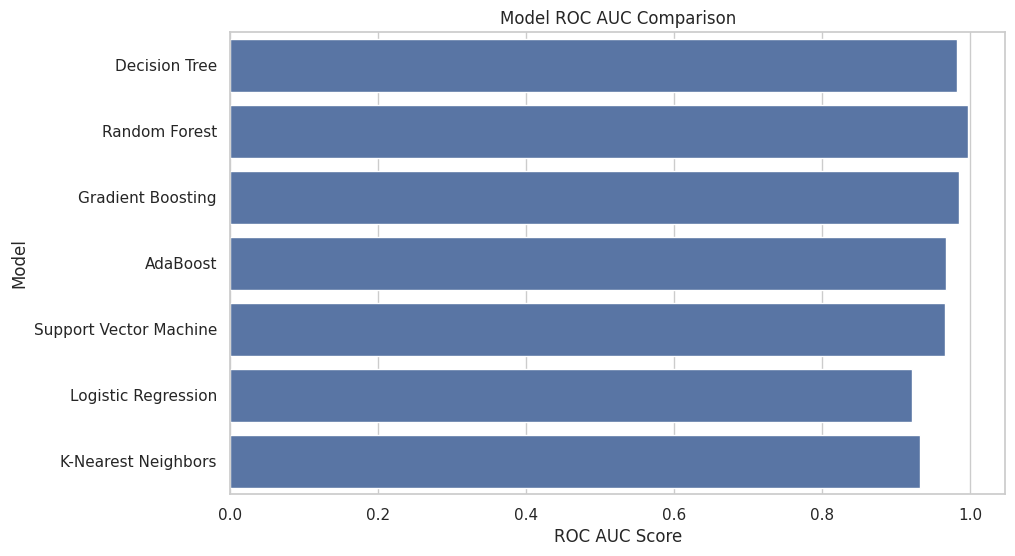

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ROC AUC Score', y='Model', data=results_df)
plt.title('Model ROC AUC Comparison')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Execution Time', y='Model', data=results_df)
plt.title('Model Execution Time Comparison')
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import accuracy_score  # Make sure to import the accuracy_score function

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf) # Call the imported function
print("Accuracy of Random Forest after tuning:", accuracy_rf)

Accuracy of Random Forest after tuning: 1.0


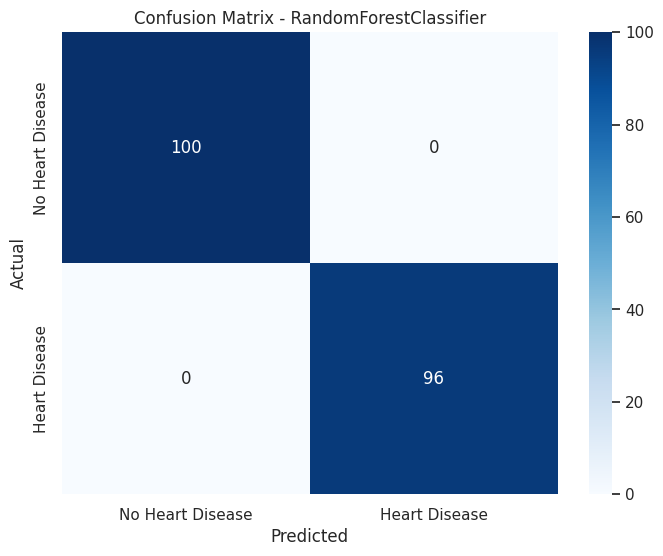

In [ ]:
confusioin_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusioin_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_rf, target_names = ['No Heart Disease', 'Heart Disease'])
print(report)

                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       100
   Heart Disease       1.00      1.00      1.00        96

        accuracy                           1.00       196
       macro avg       1.00      1.00      1.00       196
    weighted avg       1.00      1.00      1.00       196



In [ ]:
import joblib
model_filename = 'heart_disease_classification_model.pkl'
joblib.dump(best_rf, model_filename)

print(f"Model saved as {model_filename}")

Model saved as heart_disease_classification_model.pkl
